<a href="https://colab.research.google.com/github/melitaea/Prediksi-Harga-Mobil-Bekas-Menggunakan-Algoritma-Machine-Learning/blob/main/22_11_4730_Prediksi_Harga_Mobil_Bekas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset successfully loaded.

Dataset Head:
    no               model  tahun      harga transmisi  jarak_tempuh  \
0   1          Mitsubishi   1870  290000000    Manual         27499   
1   2  Honda civic type R   2022  400000000    Manual         20000   
2   3     Toyota Innova V   2017  370000000    Manual       5000000   
3   4         Toyota Agya   2020  136000000    Manual         24089   
4   5         Toyota Agya   2017  200000000    Manual         19400   

              bahan_bakar    pajak  mpg  ukuran_mesin  
0  Petrol/Gasoline/Bensin  1800000   28           1.8  
1            Diesel/Solar   150000   25           1.2  
2  Petrol/Gasoline/Bensin  2000000   28           1.8  
3  Petrol/Gasoline/Bensin  1725250   20           1.0  
4  Petrol/Gasoline/Bensin  1200000   22           1.2  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        ---------

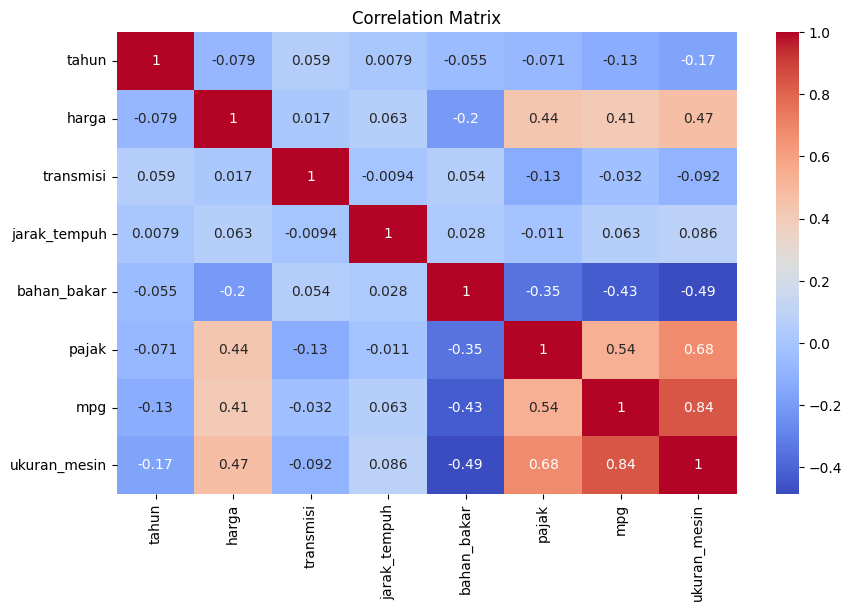

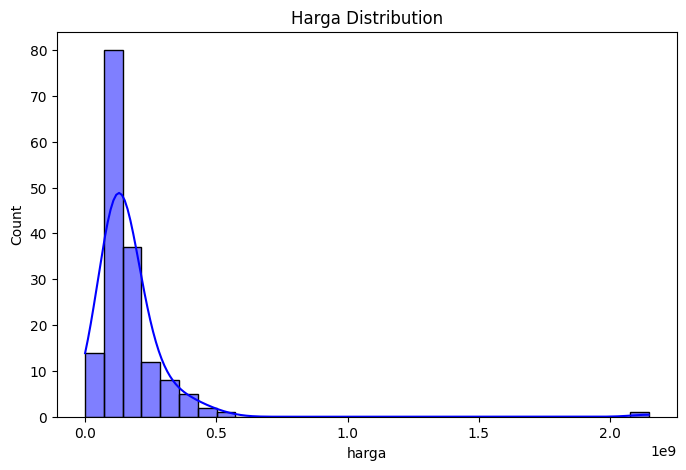

Mean Squared Error: 6933246081430888.0
R-squared: -0.15754436780203962


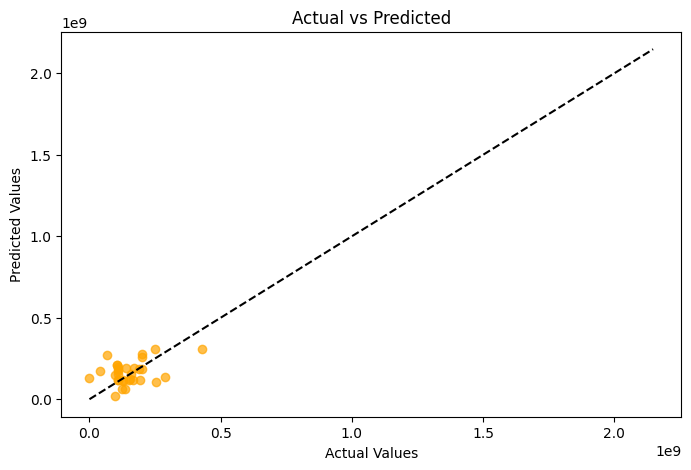

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
data_url = '/Dataset Mobil Bekas.csv'

try:
    df = pd.read_csv(data_url)
    print("Dataset successfully loaded.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Inspect dataset
print("\nDataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()

# Data Preprocessing
# Drop duplicates and handle missing values
df.drop_duplicates(inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert categorical columns to numerical
df['transmisi'] = df['transmisi'].astype('category').cat.codes
df['bahan_bakar'] = df['bahan_bakar'].astype('category').cat.codes

# Feature selection (drop irrelevant columns)
columns_to_drop = ['no', 'model']
df = df.drop(columns=columns_to_drop, axis=1)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution of target variable (price)
plt.figure(figsize=(8, 5))
sns.histplot(df['harga'], kde=True, bins=30, color='blue')
plt.title("Harga Distribution")
plt.show()

# Splitting data into training and testing sets
X = df.drop('harga', axis=1)
y = df['harga']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()
